In [329]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler,LabelEncoder, OneHotEncoder

In [330]:
#load data
data=pd.read_csv('Employee.csv')
data

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


In [331]:
data_info=data.info()
data_head=data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  140 non-null    object 
 1   Age      130 non-null    float64
 2   Salary   124 non-null    float64
 3   Place    134 non-null    object 
 4   Country  148 non-null    object 
 5   Gender   148 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.1+ KB


In [332]:
#Display unique values and their counts
for column in data.columns:
    unique_values=data[column].unique()
    print(f"Unique values in '{column}': {unique_values} (Count:{len(unique_values)})")

Unique values in 'Company': ['TCS' 'Infosys' 'CTS' nan 'Tata Consultancy Services' 'Congnizant'
 'Infosys Pvt Lmt'] (Count:7)
Unique values in 'Age': [20. 30. 35. 40. 23. nan 34. 45. 18. 22. 32. 37. 50. 21. 46. 36. 26. 41.
 24. 25. 43. 19. 38. 51. 31. 44. 33. 17.  0. 54.] (Count:30)
Unique values in 'Salary': [  nan 2300. 3000. 4000. 5000. 6000. 7000. 8000. 9000. 1089. 1234. 3030.
 3045. 3184. 4824. 5835. 7084. 8943. 8345. 9284. 9876. 2034. 7654. 2934.
 4034. 5034. 8202. 9024. 4345. 6544. 6543. 3234. 4324. 5435. 5555. 8787.
 3454. 5654. 5009. 5098. 3033.] (Count:41)
Unique values in 'Place': ['Chennai' 'Mumbai' 'Calcutta' 'Delhi' 'Podicherry' 'Cochin' nan 'Noida'
 'Hyderabad' 'Bhopal' 'Nagpur' 'Pune'] (Count:12)
Unique values in 'Country': ['India'] (Count:1)
Unique values in 'Gender': [0 1] (Count:2)


In [333]:
#statistical analysis
print(data.describe())

              Age       Salary      Gender
count  130.000000   124.000000  148.000000
mean    30.484615  5312.467742    0.222973
std     11.096640  2573.764683    0.417654
min      0.000000  1089.000000    0.000000
25%     22.000000  3030.000000    0.000000
50%     32.500000  5000.000000    0.000000
75%     37.750000  8000.000000    0.000000
max     54.000000  9876.000000    1.000000


In [334]:
#renaming columns
data.rename(columns={'Company':'Organization',
                    'Age':'Employee_Age',
                    'Salary':'Employee_Salary',
                    'Place':'Location'}, inplace=True)

In [335]:
data

,Organization,Employee_Age,Employee_Salary,Location,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


In [336]:
#remove duplicates
data.drop_duplicates(inplace=True)

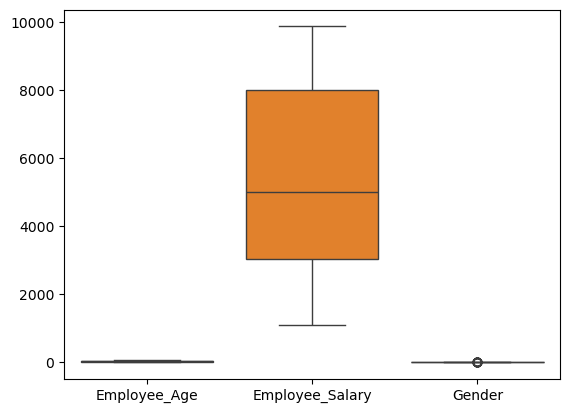

In [337]:
#find ouliners
sns.boxplot(data=data)
plt.show()

In [338]:
#replace 0 with Nan
data['Employee_Age'].replace(0,pd.NA, inplace=True)
data['Employee_Age'].head(10)

C:\Users\arunv\AppData\Local\Temp\ipykernel_8992\3504397519.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Employee_Age'].replace(0,pd.NA, inplace=True)


0    20.0
1    30.0
2    35.0
3    40.0
4    23.0
5     NaN
6     NaN
7    23.0
8    34.0
9    45.0
Name: Employee_Age, dtype: object

In [339]:
#replace null value with mean
numeric_columns=data.select_dtypes(include=['number']).columns
data[numeric_columns]=data[numeric_columns].fillna(data[numeric_columns].mean())
non_numeric_columns=data.select_dtypes(exclude=['number']).columns
data[non_numeric_columns]=data[non_numeric_columns].fillna(data[non_numeric_columns].mode().iloc[0])
print(data)

        Organization  Employee_Age  Employee_Salary  Location Country  Gender
0                TCS          20.0      5283.471074   Chennai   India       0
1            Infosys          30.0      5283.471074    Mumbai   India       0
2                TCS          35.0      2300.000000  Calcutta   India       0
3            Infosys          40.0      3000.000000     Delhi   India       0
4                TCS          23.0      4000.000000    Mumbai   India       0
..               ...           ...              ...       ...     ...     ...
142  Infosys Pvt Lmt          22.0      8202.000000    Mumbai   India       0
143              TCS          33.0      9024.000000  Calcutta   India       1
145          Infosys          44.0      4034.000000     Delhi   India       1
146              TCS          33.0      5034.000000    Mumbai   India       1
147          Infosys          22.0      8202.000000    Cochin   India       0

[144 rows x 6 columns]


C:\Users\arunv\AppData\Local\Temp\ipykernel_8992\1960184794.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[non_numeric_columns]=data[non_numeric_columns].fillna(data[non_numeric_columns].mode().iloc[0])


In [340]:
#filter data with age >40 and salary<5000
filtered_data=data[(data['Employee_Age']>40)&(data['Employee_Salary']<5000)]
print(filtered_data)

    Organization  Employee_Age  Employee_Salary   Location Country  Gender
21       Infosys          50.0           3184.0      Delhi   India       0
32       Infosys          45.0           4034.0   Calcutta   India       0
39       Infosys          41.0           3000.0     Mumbai   India       0
50       Infosys          41.0           3000.0    Chennai   India       0
57       Infosys          51.0           3184.0  Hyderabad   India       0
68       Infosys          43.0           4034.0     Mumbai   India       0
75       Infosys          44.0           3000.0     Cochin   India       0
86       Infosys          41.0           3000.0      Delhi   India       0
93       Infosys          54.0           3184.0     Mumbai   India       0
104      Infosys          44.0           4034.0      Delhi   India       0
122      Infosys          44.0           3234.0     Mumbai   India       0
129      Infosys          50.0           3184.0   Calcutta   India       0
138          CTS         

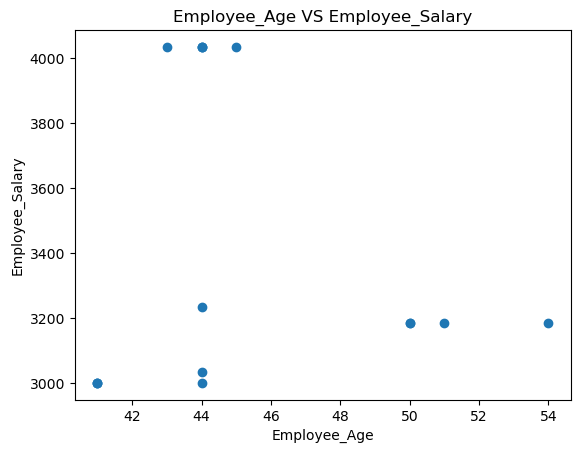

In [341]:
#Plot the chart with age and salary
plt.scatter(filtered_data['Employee_Age'],filtered_data['Employee_Salary'])
plt.xlabel('Employee_Age')
plt.ylabel('Employee_Salary')
plt.title('Employee_Age VS Employee_Salary')
plt.show()

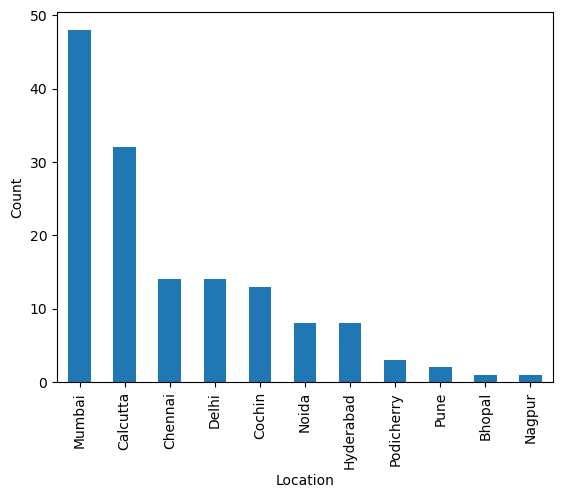

In [342]:
#Count the number of people from each place and represent it visually
place_counts=data['Location'].value_counts()
place_counts.plot(kind='bar')
plt.xlabel('Location')
plt.ylabel('Count')
plt.show()

In [343]:
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data = pd.get_dummies(data, columns=['Organization', 'Location', 'Country'], drop_first=True)
numeric_columns = ['Employee_Age', 'Employee_Salary']
print("Data after One-Hot and Label Encoding:")
print(data.head())

Data after One-Hot and Label Encoding:
   Employee_Age  Employee_Salary  Gender  Organization_Congnizant  \
0          20.0      5283.471074       0                    False   
1          30.0      5283.471074       0                    False   
2          35.0      2300.000000       0                    False   
3          40.0      3000.000000       0                    False   
4          23.0      4000.000000       0                    False   

   Organization_Infosys  Organization_Infosys Pvt Lmt  Organization_TCS  \
0                 False                         False              True   
1                  True                         False             False   
2                 False                         False              True   
3                  True                         False             False   
4                 False                         False              True   

   Organization_Tata Consultancy Services  Location_Calcutta  \
0                              

In [344]:
numeric_columns = ['Employee_Age', 'Employee_Salary']  # Update with relevant numeric columns if different

# Initialize the scalers
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

# Fit and transform the data
data_standard_scaled = data.copy()
data_standard_scaled[numeric_columns] = standard_scaler.fit_transform(data[numeric_columns])

data_minmax_scaled = data.copy()
data_minmax_scaled[numeric_columns] = minmax_scaler.fit_transform(data[numeric_columns])

# Print the scaled data
print("Standard Scaled Data:")
print(data_standard_scaled.head())

print("\nMinMax Scaled Data:")
print(data_minmax_scaled.head())

Standard Scaled Data:
   Employee_Age  Employee_Salary  Gender  Organization_Congnizant  \
0     -1.160646         0.000000       0                    False   
1     -0.048650         0.000000       0                    False   
2      0.507348        -1.264122       0                    False   
3      1.063346        -0.967526       0                    False   
4     -0.827047        -0.543818       0                    False   

   Organization_Infosys  Organization_Infosys Pvt Lmt  Organization_TCS  \
0                 False                         False              True   
1                  True                         False             False   
2                 False                         False              True   
3                  True                         False             False   
4                 False                         False              True   

   Organization_Tata Consultancy Services  Location_Calcutta  \
0                                   False       